In [1]:
import pandas as pd
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## EDA

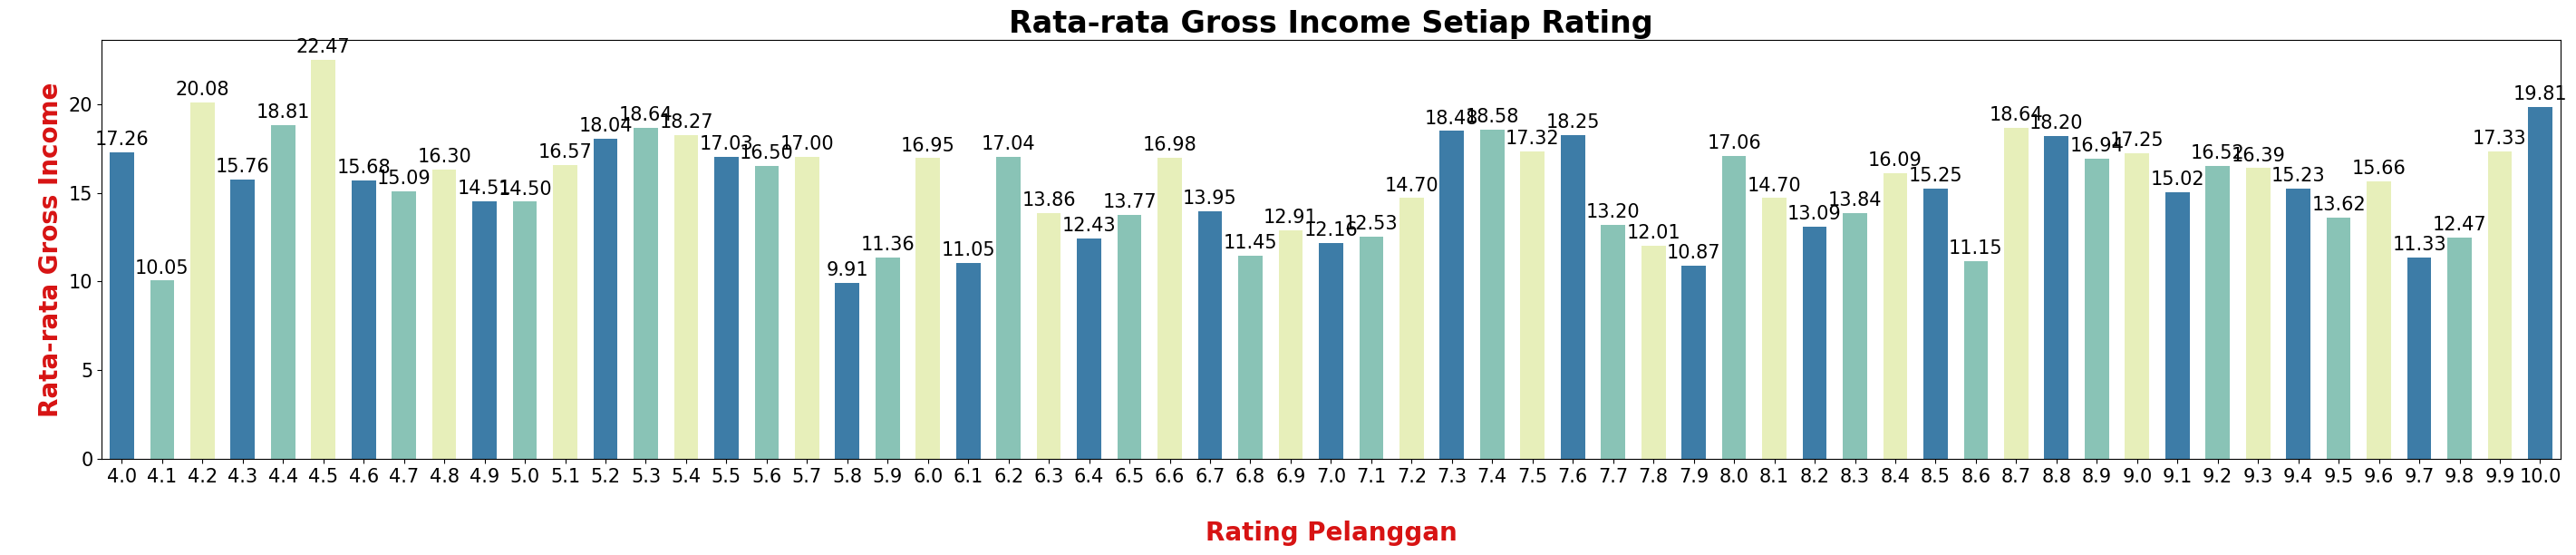

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan data berdasarkan Rating dan menghitung rata-rata gross income
df_grouped = df.groupby('Rating')['gross income'].mean().reset_index()
df_grouped.columns = ['Rating', 'Average Gross Income']

plt.figure(figsize=(35, 6))

color = ['#2c7fb8', '#7fcdbb', '#edf8b1']
ax = sns.barplot(x='Rating', y='Average Gross Income', data=df_grouped, palette=color, width=0.6)  # Adjust the width for spacing

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points', 
                fontsize=15, color='black')

ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('\nRating Pelanggan', weight='bold', color="#D71313", fontsize=20)
ax.set_ylabel('\nRata-rata Gross Income', weight='bold', color="#D71313", fontsize=20)
ax.set_title('Rata-rata Gross Income Setiap Rating', fontsize=24, weight='bold')

plt.show()


Text(0, 0.5, '\njumlah pelanggan')

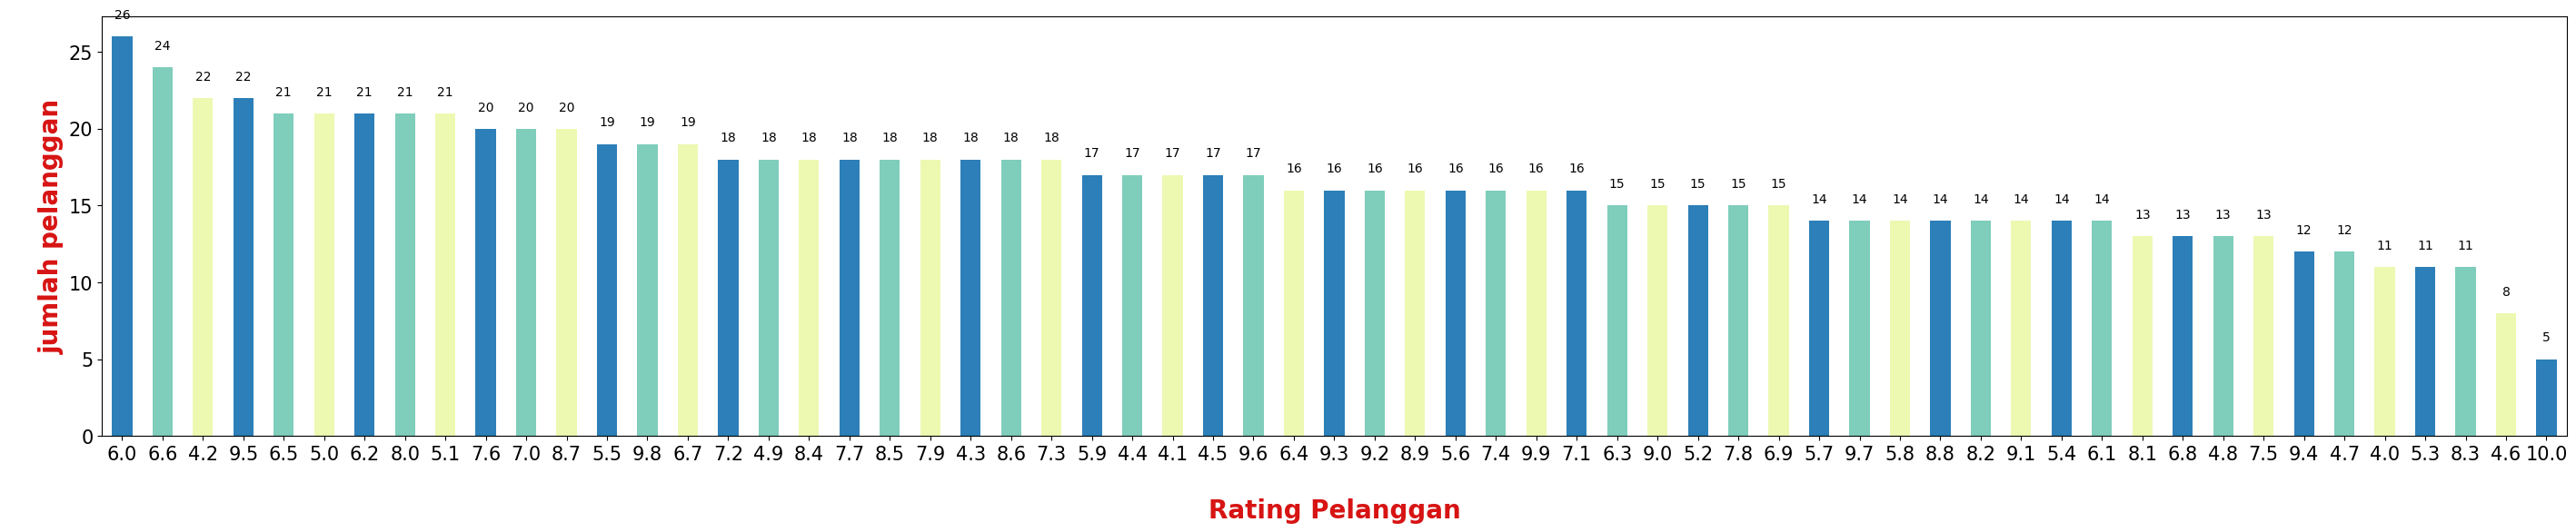

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (35, 6))

color = ['#2c7fb8', '#7fcdbb', '#edf8b1']
ax = df["Rating"].value_counts().plot(kind = 'bar', color = color, rot = 0)
# ax.set_xticklabels(('A', 'B', 'C'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('\nRating Pelanggan', weight = "bold", color = "#D71313", fontsize = 20)
plt.ylabel('\njumlah pelanggan', weight = "bold", color = "#D71313", fontsize = 20)

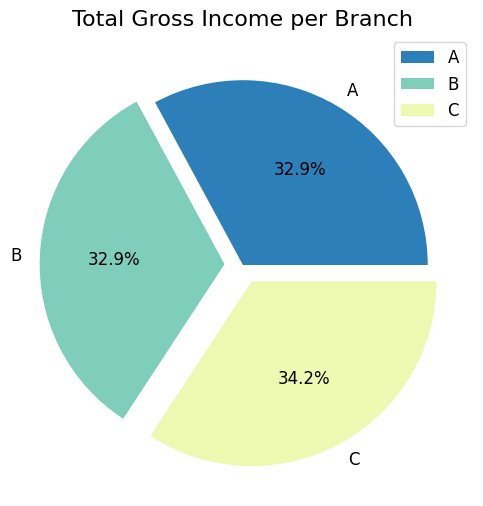

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan data berdasarkan Branch dan menghitung total gross income
df_grouped = df.groupby('Branch')['gross income'].sum().reset_index()
df_grouped.columns = ['Branch', 'Total Gross Income']

plt.figure(figsize=(20, 6))

color = ['#2c7fb8', '#7fcdbb', '#edf8b1']
explode = (0, 0.1, 0.1)

# Membuat pie chart untuk total gross income setiap Branch
counts = df_grouped.set_index('Branch')['Total Gross Income']
counts.plot(kind='pie', fontsize=12, colors=color, explode=explode, autopct='%.1f%%')

plt.title('Total Gross Income per Branch', fontsize=16)
plt.ylabel('')
plt.legend(labels=counts.index, loc='upper right', fontsize=12)
plt.show()


In [13]:
mean = df['gross income'].mean()
print(f'The average rating is: {mean}')

min = df['gross income'].min()
print(f'The minimum rating is: {min}')

max = df['gross income'].max()
print(f'The maximum rating is: {max}')

The average rating is: 15.379368999999999
The minimum rating is: 0.5085
The maximum rating is: 49.65


In [14]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Analisis Korelasi Spearman

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
import pandas as pd

# Membaca dataset
# df = pd.read_csv('/path/to/your_dataset.csv')

# Misalkan kolom tanggal disebut 'tanggal' dan kolom waktu disebut 'waktu'
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Mengekstrak hari, bulan, dan tahun ke kolom terpisah
df['hari'] = df['Date'].dt.day
df['bulan'] = df['Date'].dt.month
# df['tahun'] = df['tanggal'].dt.year

# Mengekstrak jam, menit, dan detik ke kolom terpisah
df['jam'] = df['Time'].dt.hour
df['menit'] = df['Time'].dt.minute
# df['detik'] = df['waktu'].dt.second

# df = df.drop(columns=['Date','Time'])

# Memeriksa hasil
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,hari,bulan,jam,menit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,8,3,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,3,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10,37


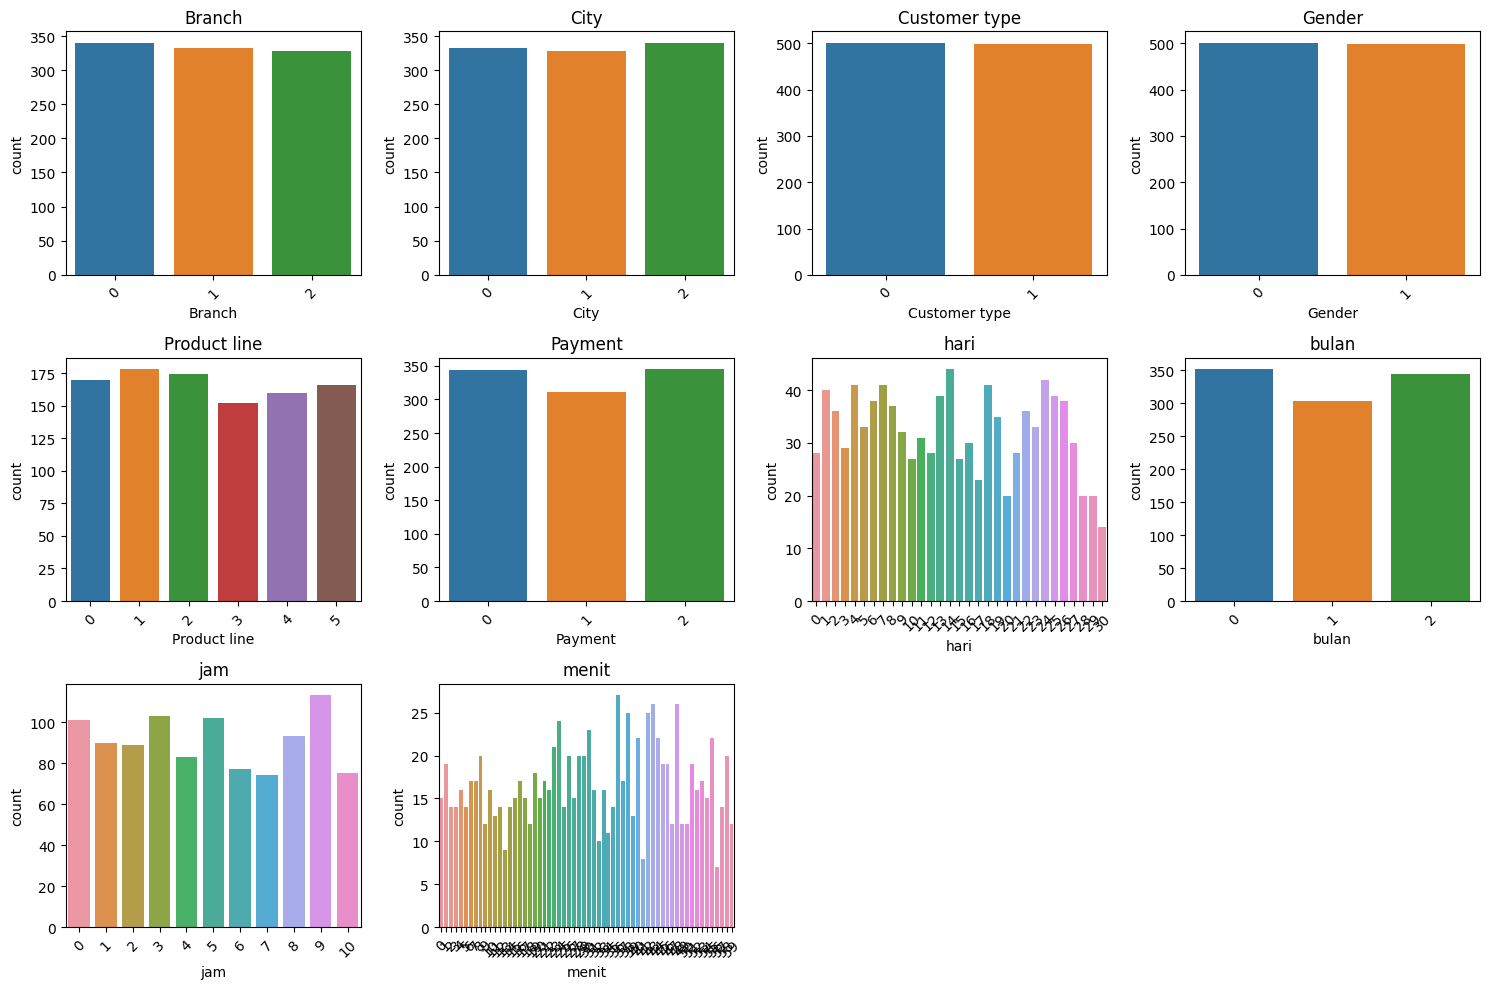

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Dataframe df harus sudah ada sebelumnya

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Daftar kolom yang ingin dilabelkan
columns_to_encode = ['Branch', 'City', 'Customer type','Gender','Product line','Payment','hari','bulan','jam','menit']

# Melabelkan kolom yang diinginkan
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Visualisasi
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_encode):
    plt.subplot(3, 4, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
from scipy.stats import spearmanr

kolom_kategorikal = ['Branch', 'City', 'Customer type','Gender','Product line','Payment','hari','bulan','jam','menit']
# Hitung korelasi Spearman antara setiap fitur kategorikal dan label 'Rating'
# Membuat DataFrame untuk menampung hasil korelasi
korelasi_df = pd.DataFrame(columns=kolom_kategorikal, index=['gross income'])

# Hitung korelasi Spearman antara setiap fitur kategorikal dan label 'Rating'
for col in kolom_kategorikal:
    spearman_corr, p_value = spearmanr(df[col], df['gross income'])
    korelasi_df[col]['gross income'] = spearman_corr

# Menampilkan matriks korelasi
print("Matriks Korelasi Spearman:")
korelasi_df.head()

Matriks Korelasi Spearman:


,Branch,City,Customer type,Gender,Product line,Payment,hari,bulan,jam,menit
gross income,0.019624,-0.005247,-0.016998,-0.051948,0.035857,-0.011271,0.002232,-0.023287,0.006832,-0.019308


## Analisis Korelasi Pearson

In [48]:
import pandas as pd

# Memilih subset kolom
kolom_kontinu = ['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'cogs','Total']

# Membuat DataFrame untuk menampung hasil korelasi
pearson_df = pd.DataFrame(columns=kolom_kontinu, index=['gross income'])

# Hitung korelasi Pearson antara setiap fitur kategorikal dan label 'Rating'
for col in kolom_kontinu:
    pearson_corr = df[col].corr(df['gross income'])
    pearson_df[col]['gross income'] = pearson_corr

# Menampilkan matriks korelasi
print("Matriks Korelasi Pearson:")
pearson_df.head()



Matriks Korelasi Pearson:


,Unit price,Quantity,Tax 5%,Rating,cogs,Total
gross income,0.633962,0.70551,1.0,-0.036442,1.0,1.0


## Kolom terpilih hasil analisis korelasi

In [3]:
selected_columns = df[['Unit price', 'Quantity', 'Tax 5%', 'cogs','Total']]

In [59]:
selected_columns.isnull().sum()

Unit price    0
Quantity      0
Tax 5%        0
cogs          0
Total         0
dtype: int64

## Analisis Outlier

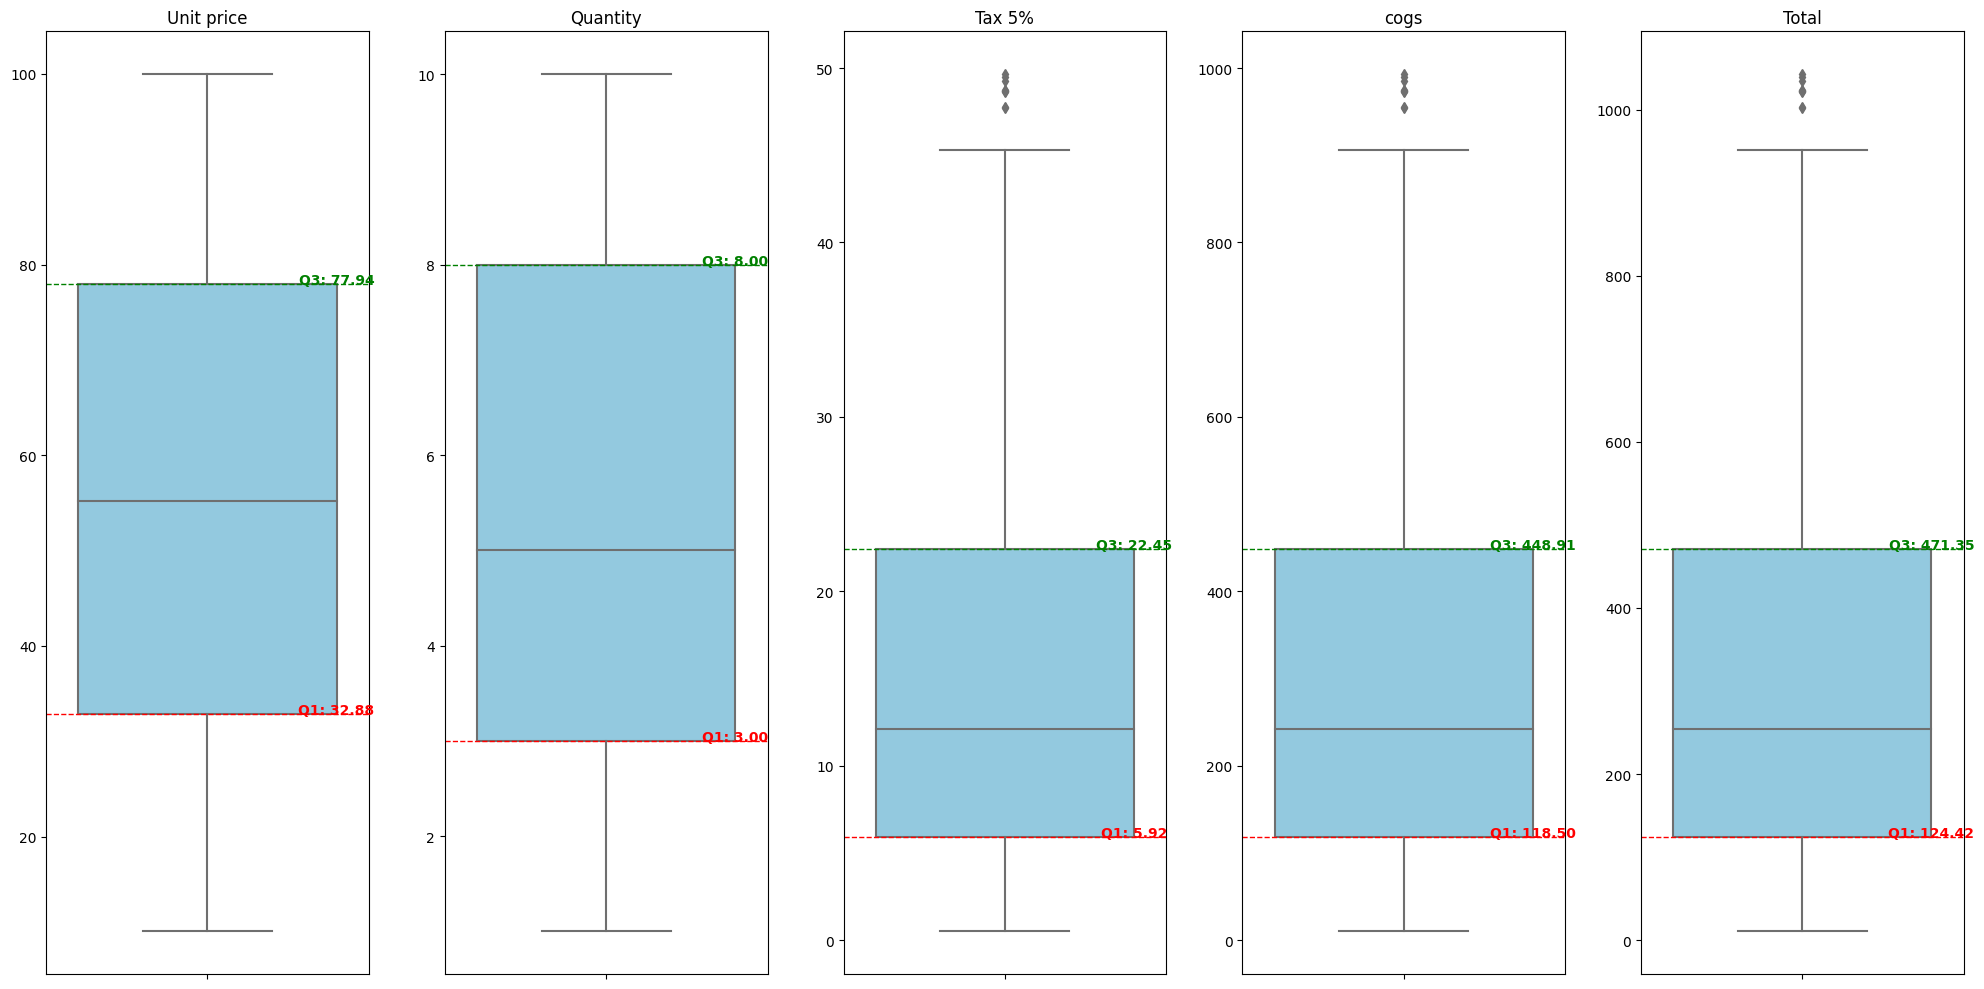

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih kolom yang akan diperiksa untuk outlier
selected_columns = df[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'Total']]

# Menentukan ukuran plot
plt.figure(figsize=(20, 10))

# Membuat boxplot untuk setiap fitur
for i, col in enumerate(selected_columns.columns, 1):
    plt.subplot(1, len(selected_columns.columns), i)
    sns.boxplot(y=selected_columns[col], color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

    # Menampilkan Q1 dan Q3
    Q1 = selected_columns[col].quantile(0.25)
    Q3 = selected_columns[col].quantile(0.75)
    plt.axhline(Q1, color='red', linestyle='--', linewidth=1)
    plt.axhline(Q3, color='green', linestyle='--', linewidth=1)

    # Menambahkan label untuk Q1 dan Q3
    plt.text(0.4, Q1, f'Q1: {Q1:.2f}', horizontalalignment='center', color='red', fontsize=10, weight='bold')
    plt.text(0.4, Q3, f'Q3: {Q3:.2f}', horizontalalignment='center', color='green', fontsize=10, weight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Memilih kolom yang akan diperiksa untuk outlier
# selected_columns = ['Tax 5%', 'cogs', 'Total']

# Deteksi dan ganti outlier dengan nilai median
for col in selected_columns:
    Q1 = selected_columns[col].quantile(0.25)
    Q3 = selected_columns[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df[col].median()
    
    # Ganti outlier dengan median
    selected_columns.loc[(selected_columns[col] < lower_bound) | (selected_columns[col] > upper_bound), col] = median_value

# Tampilkan hasil untuk memastikan perubahan
print("Data setelah mengganti outlier dengan nilai median:")
print(selected_columns.describe())


Data setelah mengganti outlier dengan nilai median:
        Unit price     Quantity       Tax 5%         cogs        Total
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     55.672130     5.510000    15.049521   300.990420   316.039941
std      26.494628     2.923431    11.271937   225.438749   236.710686
min      10.080000     1.000000     0.508500    10.170000    10.678500
25%      32.875000     3.000000     5.924875   118.497500   124.422375
50%      55.230000     5.000000    12.084000   241.680000   253.764000
75%      77.935000     8.000000    22.041000   440.820000   462.861000
max      99.960000    10.000000    45.325000   906.500000   951.825000


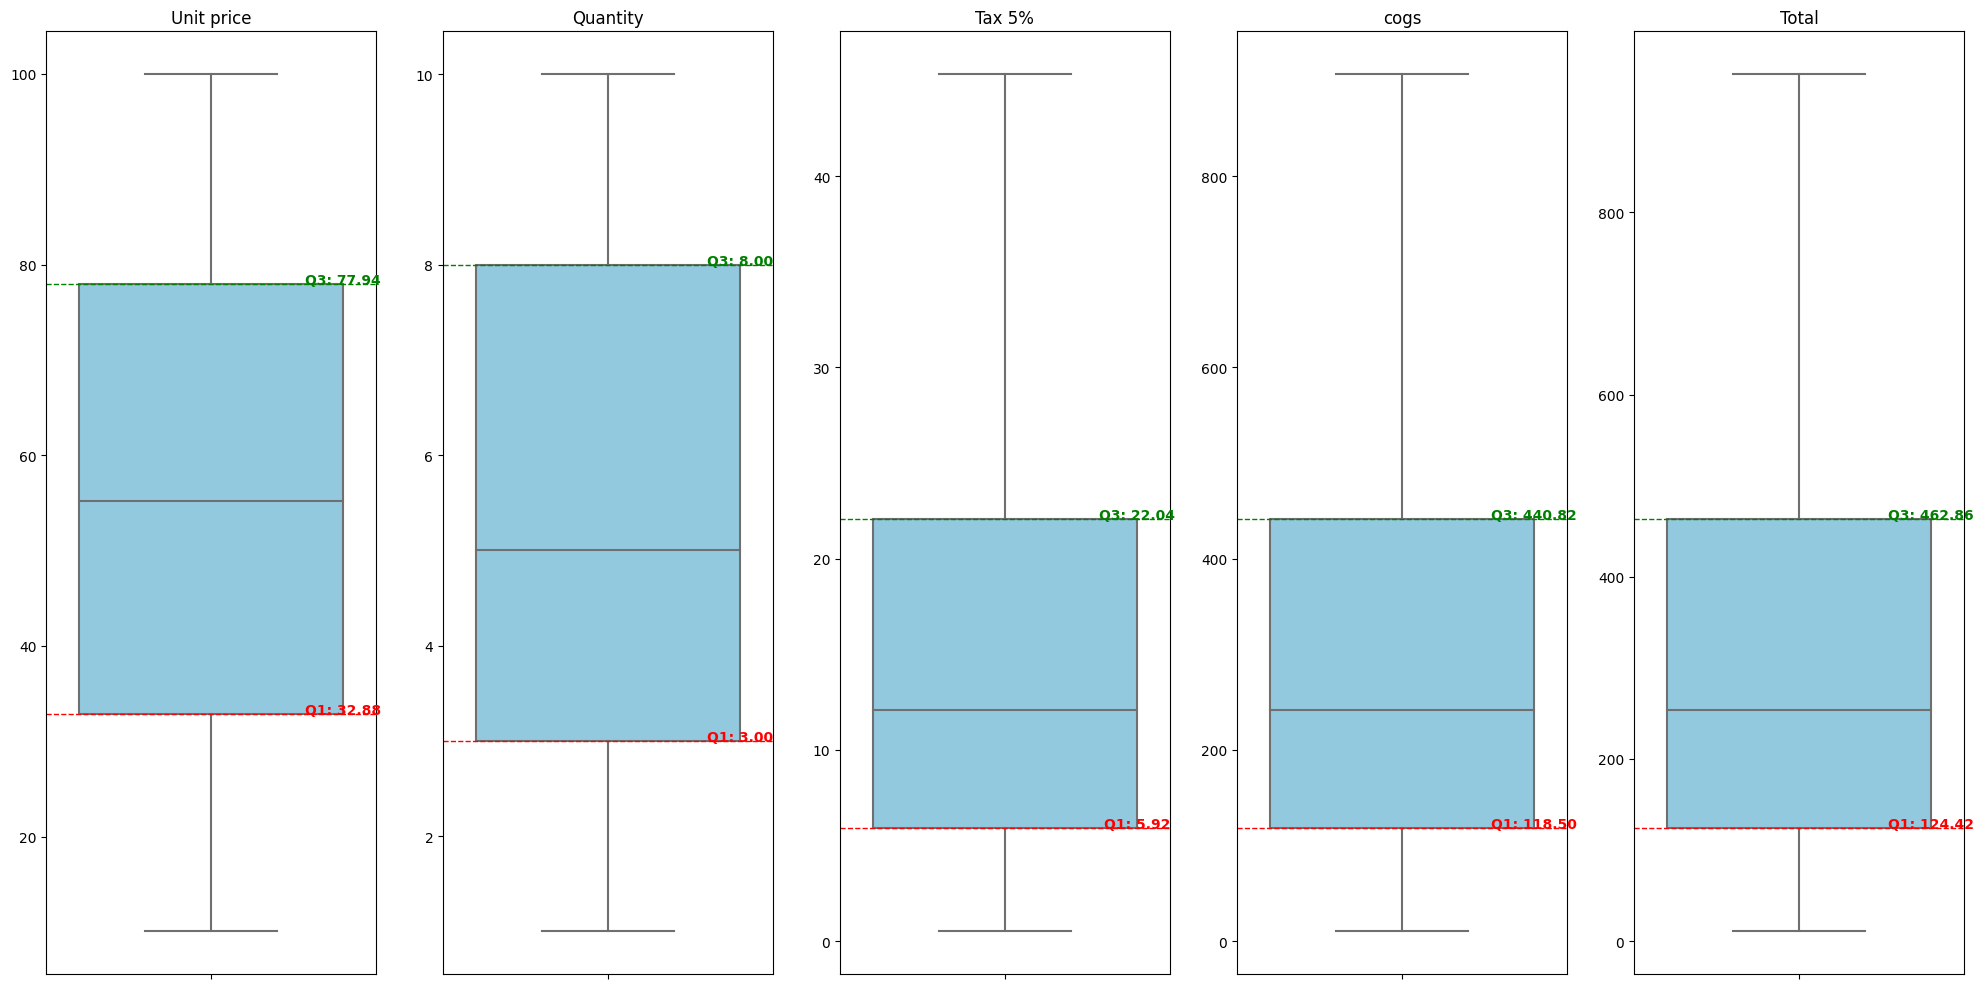

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan ukuran plot
plt.figure(figsize=(20, 10))

# Membuat boxplot untuk setiap fitur
for i, col in enumerate(selected_columns.columns, 1):
    plt.subplot(1, len(selected_columns.columns), i)
    sns.boxplot(y=selected_columns[col], color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

    # Menampilkan Q1 dan Q3
    Q1 = selected_columns[col].quantile(0.25)
    Q3 = selected_columns[col].quantile(0.75)
    plt.axhline(Q1, color='red', linestyle='--', linewidth=1)
    plt.axhline(Q3, color='green', linestyle='--', linewidth=1)

    # Menambahkan label untuk Q1 dan Q3
    plt.text(0.4, Q1, f'Q1: {Q1:.2f}', horizontalalignment='center', color='red', fontsize=10, weight='bold')
    plt.text(0.4, Q3, f'Q3: {Q3:.2f}', horizontalalignment='center', color='green', fontsize=10, weight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [7]:
selected_columns.head(10)

,Unit price,Quantity,Tax 5%,cogs,Total
0,74.69,7,26.1415,522.83,548.9715
1,15.28,5,3.8200,76.40,80.2200
2,46.33,7,16.2155,324.31,340.5255
3,58.22,8,23.2880,465.76,489.0480
4,86.31,7,30.2085,604.17,634.3785
5,85.39,7,29.8865,597.73,627.6165
6,68.84,6,20.6520,413.04,433.6920
7,73.56,10,36.7800,735.60,772.3800
8,36.26,2,3.6260,72.52,76.1460
9,54.84,3,8.2260,164.52,172.7460


## 1. Tahap Pertama (Seleksi Fitur Analisi Korelasi)

In [27]:
# split into train and test sample
from sklearn.model_selection import train_test_split
X = selected_columns
y= df['gross income']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=123)

In [28]:
# select model
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=5, random_state=123)

In [29]:
# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=123)

In [30]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = dtr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.3771453624603033
Mean Squared Error (MSE): 0.21190091980402773
Root Mean Squared Error (RMSE): 0.46032697053727767


## 2. Tahap kedua (Optimasi Parameter GridsearchCV)

In [31]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [35]:
# Menentukan parameter grid untuk GridSearchCV
param_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import time

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=2)

# Mencatat waktu mulai
start_time = time.time()

# Melatih GridSearchCV dengan data pelatihan
grid_search.fit(X_train, y_train)

# Mencatat waktu selesai
end_time = time.time()

# Menghitung waktu komputasi
elapsed_time = end_time - start_time
print(f"Waktu komputasi: {elapsed_time:.2f} detik")

# Mendapatkan model terbaik
best_model = grid_search.best_estimator_
print(best_model)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits
Waktu komputasi: 297.94 detik
DecisionTreeRegressor(criterion='friedman_mse', random_state=123,
                      splitter='random')


In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.05619249999999983
Mean Squared Error (MSE): 0.02046357374999996
Root Mean Squared Error (RMSE): 0.14305094809192967


## 3. Tahap ketiga (Best parameter model + Data normalisasi)

In [59]:
selected_columns.head()

,Unit price,Quantity,Tax 5%,cogs,Total
0,74.69,7,26.1415,522.83,548.9715
1,15.28,5,3.8200,76.40,80.2200
2,46.33,7,16.2155,324.31,340.5255
3,58.22,8,23.2880,465.76,489.0480
4,86.31,7,30.2085,604.17,634.3785


In [60]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Memilih kolom yang akan dinormalisasi
kolom_normalisasi = selected_columns.columns  # Mengambil nama kolom dari DataFrame selected_columns
# Normalisasi data menggunakan MinMaxScaler
df_normalisasi = pd.DataFrame(scaler.fit_transform(selected_columns), columns=kolom_normalisasi)

# Cek hasil
df_normalisasi.head()


,Unit price,Quantity,Tax 5%,cogs,Total
0,0.718847,0.666667,0.571955,0.571955,0.571955
1,0.057855,0.444444,0.073890,0.073890,0.073890
2,0.403316,0.666667,0.350474,0.350474,0.350474
3,0.535603,0.777778,0.508284,0.508284,0.508284
4,0.848131,0.666667,0.662702,0.662702,0.662702


In [61]:
from sklearn.model_selection import train_test_split
X = df_normalisasi
y = df['gross income']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)


In [62]:
# select model
from sklearn.tree import DecisionTreeRegressor,plot_tree
tahap3=DecisionTreeRegressor(criterion='friedman_mse', random_state=123,splitter='random')

In [63]:
# train model
tahap3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=123,
                      splitter='random')

In [64]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tahap3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.05619249999999983
Mean Squared Error (MSE): 0.02046357374999996
Root Mean Squared Error (RMSE): 0.14305094809192967


## 4. Tahap keempat (Best parameter model + PCA)

In [78]:
df_pca = selected_columns
df_pca.head()

,Unit price,Quantity,Tax 5%,cogs,Total
0,74.69,7,26.1415,522.83,548.9715
1,15.28,5,3.8200,76.40,80.2200
2,46.33,7,16.2155,324.31,340.5255
3,58.22,8,23.2880,465.76,489.0480
4,86.31,7,30.2085,604.17,634.3785


In [79]:
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=1)  # Ganti angka 3 dengan jumlah komponen yang diinginkan

# Melakukan PCA pada data yang telah dinormalisasi
X_pca = pca.fit_transform(df_pca)

# Konversi hasil PCA menjadi DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(df_pca.shape)
df_pca.head()

(1000, 1)


,PC1
0,322.409200
1,-327.452364
2,33.335455
3,238.899506
4,440.851968


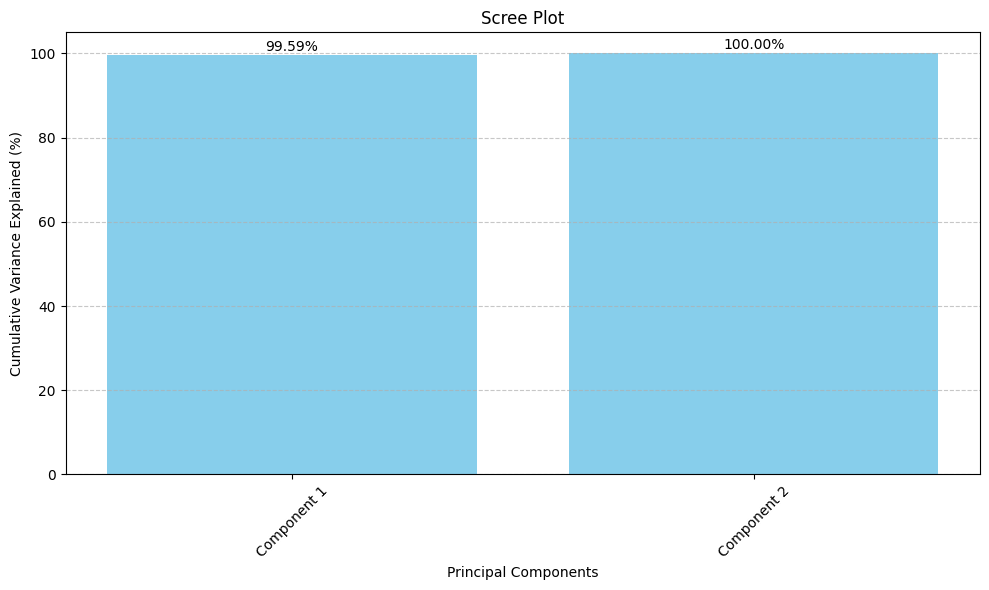

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Mengakses proporsi varians yang dijelaskan oleh setiap komponen
explained_variance_ratio = pca.explained_variance_ratio_

# Membuat scree plot
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Menyiapkan data untuk diagram batang
x_labels = [f'Component {i+1}' for i in range(len(cumulative_variance_ratio))]
y_values = cumulative_variance_ratio * 100

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Scree Plot')

# Menambahkan label persentase pada batang
for i, value in enumerate(y_values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [80]:
cumulative_variance_ratio

array([0.9958935 , 0.99997968])

In [81]:
# split into train and test sample
from sklearn.model_selection import train_test_split
X = df_pca
y= df['gross income']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=123)

In [84]:
# select model
from sklearn.tree import DecisionTreeRegressor,plot_tree
tahap4=DecisionTreeRegressor(criterion='friedman_mse', random_state=123,splitter='random')

In [85]:
# train model
tahap4.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=123,
                      splitter='random')

In [86]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tahap4.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.05684999999999994
Mean Squared Error (MSE): 0.005942107499999991
Root Mean Squared Error (RMSE): 0.07708506664717876


## 5. Tahap kelima (Best parameter model + Data normalisasi + PCA)

In [119]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Memilih kolom yang akan dinormalisasi
kolom_normalisasi = selected_columns.columns  # Mengambil nama kolom dari DataFrame selected_columns
# Normalisasi data menggunakan MinMaxScaler
df_normalisasi = pd.DataFrame(scaler.fit_transform(selected_columns), columns=kolom_normalisasi)

# Cek hasil
df_normalisasi.head()


,Unit price,Quantity,Tax 5%,cogs,Total
0,0.718847,0.666667,0.571955,0.571955,0.571955
1,0.057855,0.444444,0.073890,0.073890,0.073890
2,0.403316,0.666667,0.350474,0.350474,0.350474
3,0.535603,0.777778,0.508284,0.508284,0.508284
4,0.848131,0.666667,0.662702,0.662702,0.662702


In [120]:
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=0.95)  # Ganti angka 3 dengan jumlah komponen yang diinginkan

# Melakukan PCA pada data yang telah dinormalisasi
X_pca = pca.fit_transform(df_normalisasi)

# Konversi hasil PCA menjadi DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(df_pca.shape)
df_pca.head()

(1000, 2)


,PC1,PC2
0,0.499366,-0.076966
1,-0.533898,0.326058
2,0.078450,0.184368
3,0.398541,0.140950
4,0.671828,-0.184042


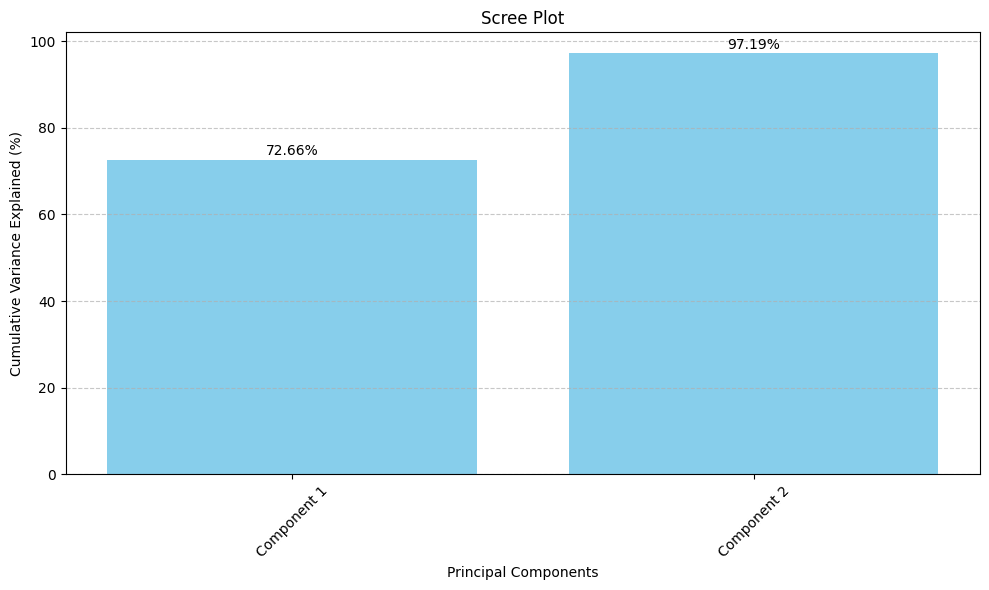

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Mengakses proporsi varians yang dijelaskan oleh setiap komponen
explained_variance_ratio = pca.explained_variance_ratio_

# Membuat scree plot
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Menyiapkan data untuk diagram batang
x_labels = [f'Component {i+1}' for i in range(len(cumulative_variance_ratio))]
y_values = cumulative_variance_ratio * 100

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Scree Plot')

# Menambahkan label persentase pada batang
for i, value in enumerate(y_values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [132]:
# split into train and test sample
from sklearn.model_selection import train_test_split
X = df_pca
y= df['gross income']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=123)

In [133]:
# select model
from sklearn.tree import DecisionTreeRegressor,plot_tree
tahap5=DecisionTreeRegressor(criterion='friedman_mse', random_state=123,splitter='random')

In [134]:
# train model
tahap5.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=123,
                      splitter='random')

In [136]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = tahap5.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.3508575
Mean Squared Error (MSE): 3.5235726262499996
Root Mean Squared Error (RMSE): 1.8771181705609266
